TASK 5: Credit Card Fraud Detection

NAME : PARTH BHADAURIA

BATCH : JULY

DOMAIN : DATA SCIENCE

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()
df['Class'].value_counts()  # 0 = genuine, 1 = fraud


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,count
Class,
0,284315
1,492


In [ ]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

print("Before:", np.bincount(y_train))
print("After:", np.bincount(y_res))


Before: [227451    394]
After: [394 394]


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res, y_res)


LogisticRegression(max_iter=1000)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Genuine', 'Fraud']))


              precision    recall  f1-score   support

     Genuine       1.00      0.98      0.99     56864
       Fraud       0.06      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



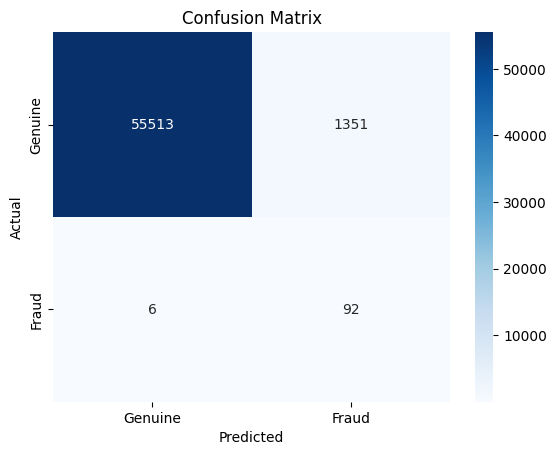

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine','Fraud'], yticklabels=['Genuine','Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


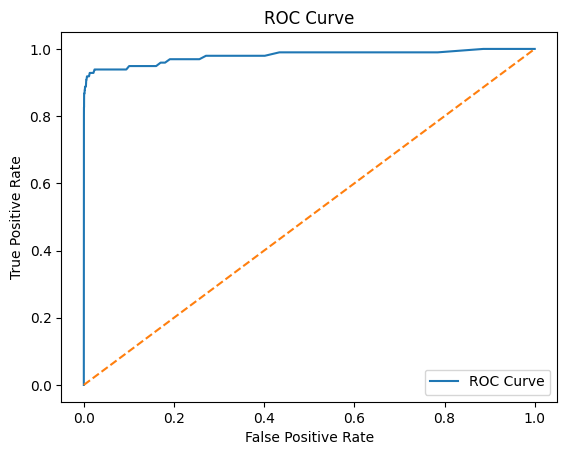

AUC Score: 0.9792578856247057


In [ ]:
y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_probs))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res, y_res)
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

print("🔹 Logistic Regression Report:\n")
print(classification_report(y_test, lr_pred))

print("🔹 Random Forest Report:\n")
print(classification_report(y_test, rf_pred))

print("🔹 AUC Scores:")
print("Logistic Regression AUC:", roc_auc_score(y_test, lr_proba))
print("Random Forest AUC:", roc_auc_score(y_test, rf_proba))


🔹 Logistic Regression Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

🔹 Random Forest Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

🔹 AUC Scores:
Logistic Regression AUC: 0.979531273328127
Random Forest AUC: 0.9792578856247057


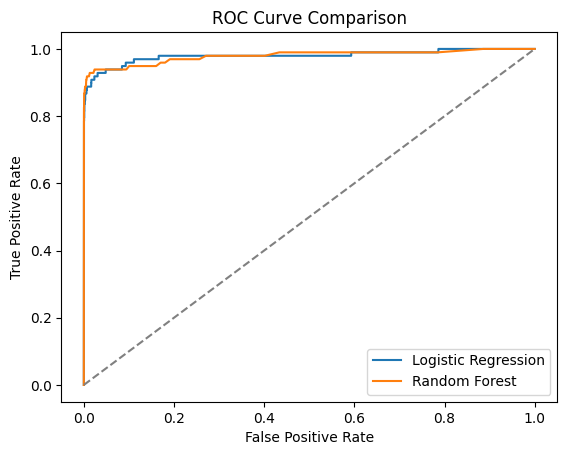

In [ ]:
from sklearn.metrics import roc_curve

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)

plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


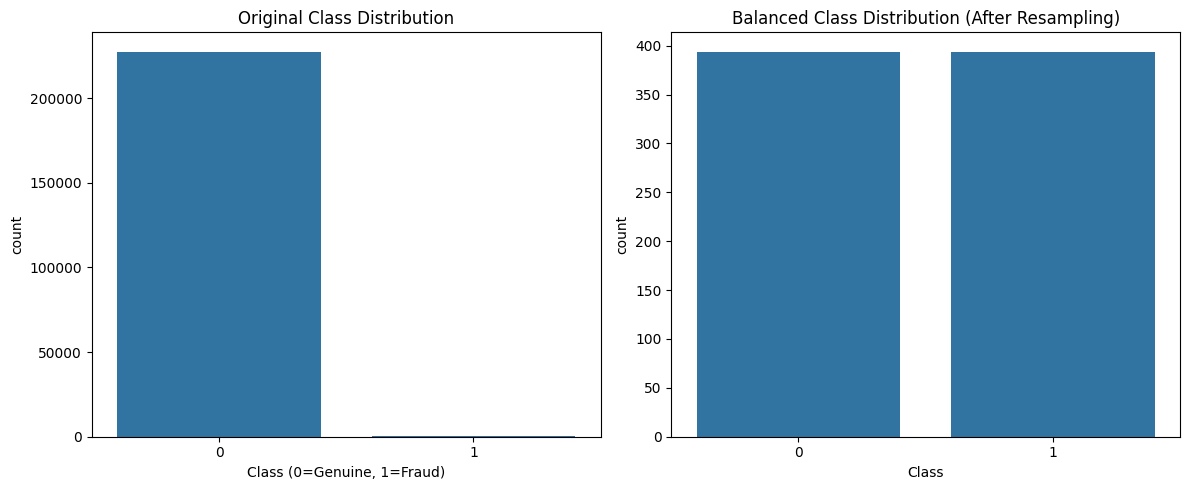

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Original Class Distribution")
plt.xlabel("Class (0=Genuine, 1=Fraud)")

plt.subplot(1,2,2)
sns.countplot(x=y_res)
plt.title("Balanced Class Distribution (After Resampling)")
plt.xlabel("Class")

plt.tight_layout()
plt.show()


/tmp/ipython-input-19-2682505853.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Genuine', shade=True)
/tmp/ipython-input-19-2682505853.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', shade=True, color='red')


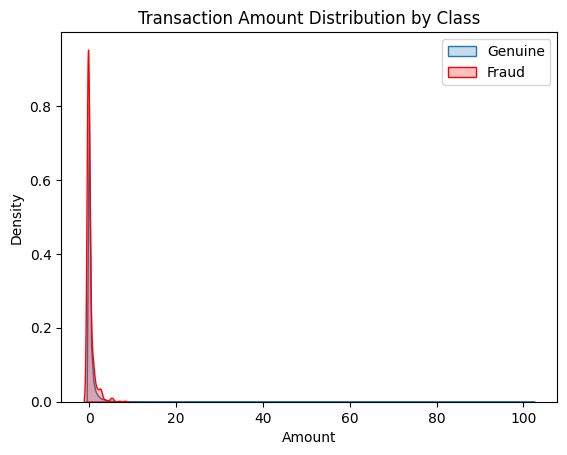

In [ ]:
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Genuine', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', shade=True, color='red')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Amount')
plt.legend()
plt.show()


/tmp/ipython-input-20-3647471407.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Time'], label='Genuine', shade=True)
/tmp/ipython-input-20-3647471407.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', shade=True, color='red')


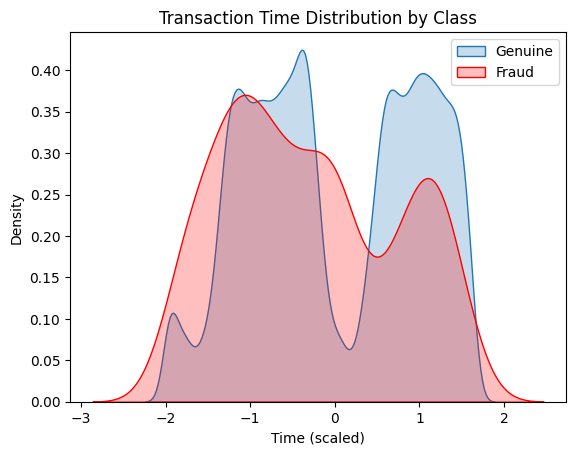

In [ ]:
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Genuine', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', shade=True, color='red')
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (scaled)')
plt.legend()
plt.show()
